In [1]:
from behavenet import get_user_dir
import os
import numpy
import matplotlib.pyplot as plt
import h5py
import pandas as pd

from behavenet import get_user_dir, make_dir_if_not_exists
from behavenet.fitting.utils import get_expt_dir
from behavenet.fitting.utils import get_session_dir
from behavenet.fitting.utils import get_best_model_version
from behavenet.fitting.utils import get_lab_example

In [5]:
data_dir = get_user_dir('data')
expt_path = os.path.join(data_dir, 'dipoppa', 'MSP_pupil', 'MD0ST5', '4', 'data.hdf5') 
expt = h5py.File(expt_path, 'r', libver='latest', swmr=True)

In [6]:
labels = expt['labels']['trial_0000'][:]
labels_sc = expt['labels_sc']['trial_0000'][:]

In [7]:
labels.shape, labels_sc.shape

((150, 3), (150, 3))

Text(0.5, 1.0, 'Pupil Area, Raw Labels')

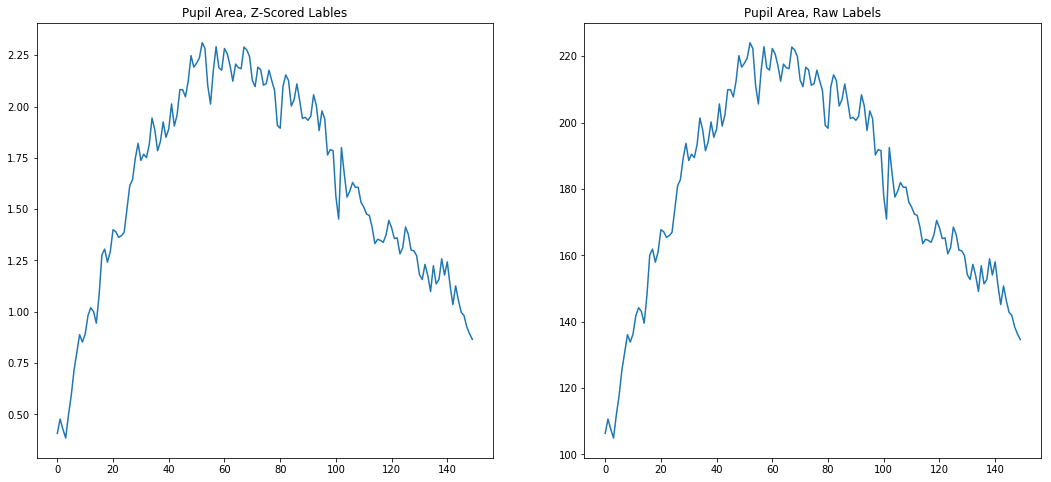

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
ax1.plot(labels[:, 0])
ax2.plot(labels_sc[:, 0])

ax1.set_title('Pupil Area, Z-Scored Lables')
ax2.set_title('Pupil Area, Raw Labels')

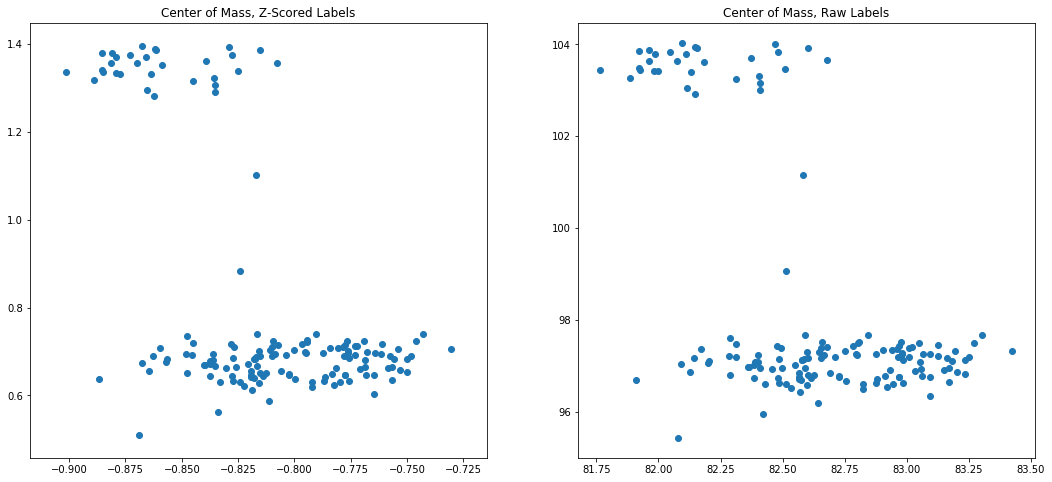

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
ax1.scatter(labels[:, 1], labels[:, 2])
ax2.scatter(labels_sc[:, 1], labels_sc[:, 2])

ax1.set_title('Center of Mass, Z-Scored Labels')
ax2.set_title('Center of Mass, Raw Labels')

plt.show()

In [10]:
from behavenet.fitting.utils import get_best_model_version

def get_tags(expt='MSP_pupil', expt_name='latent_search', version='best', n_ae_latents=9, sess_id='session_1'):
    hparams = {
        'data_dir': get_user_dir('data'),
        'save_dir': get_user_dir('save'),
        'experiment_name': expt_name,
        'model_class': 'cond-ae-msp',
        'model_type': 'conv',
        'n_ae_latents': n_ae_latents,
    }
   
    lab = 'dipoppa'
    expt = expt
    n_labels = 3
    hparams['n_ae_latents'] += n_labels
    get_lab_example(hparams, lab, expt)
    hparams['session'] = sess_id
    hparams['session_dir'], sess_ids = get_session_dir(hparams)
    
    expt_dir = get_expt_dir(hparams)    
    
    if version == 'best':
        version = get_best_model_version(expt_dir)[0]
        
    version_dir = os.path.join(expt_dir, 'version_%i' % version)
    df = pd.read_csv(os.path.join(version_dir, 'meta_tags.csv'))
    return df

In [16]:
MD0ST5_1 = get_tags(expt='pupil_msp', n_ae_latents=6, expt_name='latent_search', sess_id='1')

In [18]:
MD0ST5_4 = get_tags(expt='pupil_msp', n_ae_latents=6, expt_name='pupil_msp', sess_id='4')

In [21]:
df_diff(MD0ST5_4, MD0ST5_1)

,key,value,_merge
85,data_config,/home/yoni/.behavenet/dipoppa_pupil_msp_params...,right_only
86,session,1,right_only
87,experiment_name,latent_search,right_only
88,l2_reg,0.001,right_only
89,ae_arch_json,~/.behavenet/ae_arch_default.json,right_only
90,pretrained_weights_path,/home/samsung_2tb_ssd/yoni/results/dipoppa/MSP...,right_only
91,gpus_viz,1,right_only
92,n_parallel_gpus,1,right_only
93,session_dir,/home/samsung_2tb_ssd/yoni/results/dipoppa/MSP...,right_only
94,expt_dir,/home/samsung_2tb_ssd/yoni/results/dipoppa/MSP...,right_only


In [19]:
def df_diff(df1, df2):
    df = df1.merge(df2, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']
    return df

In [80]:
df_diff(SB028_d12, SB028_d9)

,key,value,_merge
86,n_ae_latents,12,right_only
87,expt_dir,/home/samsung_2tb_ssd/yoni/results/dipoppa/MSP...,right_only
88,version,1,right_only
89,hidden_layer_size,12,right_only


In [84]:
df_diff(MD0ST5, SB028_d12)

,key,value,_merge
85,l2_reg,0,right_only
86,msp_weight,0.1,right_only
87,architecture_params,"{'ae_network_type': 'strides_only', 'ae_paddin...",right_only
88,data_config,/home/yoni/.behavenet/dipoppa_MSP_pupil_params...,right_only
89,animal,SB028,right_only
90,session,6,right_only
91,experiment_name,latent_search,right_only
92,ae_arch_json,~/.behavenet/ae_arch_default.json,right_only
93,n_parallel_gpus,1,right_only
94,session_dir,/home/samsung_2tb_ssd/yoni/results/dipoppa/MSP...,right_only


In [19]:
SB028_d9 = get_tags(n_ae_latents=6, sess_id='6', version=9)
SB028_d9[SB028_d9['key'] == 'msp_weight']

,key,value
30,msp_weight,10
